<h1>Chapter 3 | Data Exercise #1 | <code>hotels-vienna</code>: EDA</h1>

<p>1. Pick another city beyond Vienna from the <code>hotels-europe</code> dataset.</p>
<p>Assignments:</p>
<ul>
    <li>Create a table comparable to the one used in our case study.</li>
    <li>Visualize the distribution of the distance and the distribution of price and compute their summary statistics.</li>
    <li>Are there extreme values? What would you do with them? Describe the two distributions in a few sentences.</li>
</ul>
<h2><b>1.</b> Load the data</h2>
<p>Maybe I got the idea wrong, but it feels like a good idea to explore a different city instead of looking at Vienna's extreme values - we can do this at the end of this notebook. For now, let's select a different European city - <b>Rome</b> - and reproduce the exploration performed in the book. We can even compare our findings with Vienna too!</p>

In [488]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
from mizani.formatters import percent_format

warnings.filterwarnings("ignore")
%matplotlib inline

In [489]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [490]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_data_exercises")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/hotels-europe/raw/"
data_out = f"{dirname}da_data_exercises/ch03-exploratory_data_analysis/01-hotels_europe/data/clean/"
output = f"{dirname}da_data_exercises/ch03-exploratory_data_analysis/01-hotels_europe/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [491]:
from py_helper_functions import *

In [492]:
hotels_europe = pd.read_csv(f"{data_in}hotelbookingdata.csv")

<p>Let's pick another city. Let's pick <b>Rome</b>.

In [493]:
hotels_europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149966 entries, 0 to 149965
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   addresscountryname      149966 non-null  object 
 1   city_actual             149966 non-null  object 
 2   rating_reviewcount      139379 non-null  float64
 3   center1distance         149966 non-null  object 
 4   center1label            149966 non-null  object 
 5   center2distance         149852 non-null  object 
 6   center2label            149852 non-null  object 
 7   neighbourhood           149966 non-null  object 
 8   price                   149966 non-null  int64  
 9   price_night             149966 non-null  object 
 10  s_city                  149966 non-null  object 
 11  starrating              149966 non-null  float64
 12  rating2_ta              136929 non-null  float64
 13  rating2_ta_reviewcount  136929 non-null  float64
 14  accommodationtype   

In [494]:
hotels_europe["s_city"].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Belgrade', 'Berlin',
       'Birmingham', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest',
       'Copenhagen', 'Dublin', 'Dubrovnik', 'Glasgow', 'Hamburg',
       'Helsinki', 'Istanbul', 'Kiev', 'Krakow', 'Lisbon', 'London',
       'Lyon', 'Madrid', 'Marseille', 'Milan', 'Minsk', 'Moscow',
       'Munich', 'Naples', 'Nicosia', 'Paris', 'Prague', 'Riga', 'Rome',
       'Rotterdam', 'Salzburg', 'Samara', 'Seville', 'Sofia',
       'St. Petersburg', 'Stockholm', 'Tallin', 'Valetta', 'Vienna',
       'Vilnius', 'Warsaw', 'Zagreb'], dtype=object)

In [495]:
"Rome" in hotels_europe["s_city"].unique()

True

In [496]:
rome = hotels_europe.loc[hotels_europe["s_city"] == "Rome"].reset_index(drop=True)
rome.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Italy,Rome,NaN,2.3 miles,City centre,2.0 miles,Palazzo Madama,Aurelio,2433,price for 4 nights,...,_ACCOM_TYPE@Apartment,NaN,1,15165.0,0,0% no offer,2017,12,0,1
1,Italy,Rome,19.0,3.2 miles,City centre,2.9 miles,Palazzo Madama,Aurelio,119,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,0,15166.0,1,1-15% offer,2018,6,1,0
2,Italy,Rome,19.0,3.2 miles,City centre,2.9 miles,Palazzo Madama,Aurelio,128,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,0,15166.0,0,0% no offer,2018,5,1,0
3,Italy,Rome,19.0,3.2 miles,City centre,2.9 miles,Palazzo Madama,Aurelio,385,price for 4 nights,...,_ACCOM_TYPE@Hotel,3.5 /5,0,15166.0,1,15-50% offer,2017,12,0,1
4,Italy,Rome,19.0,3.2 miles,City centre,4.2 miles,Grotta del Bue Marino,Aurelio,69,price for 1 night,...,_ACCOM_TYPE@Hotel,3.5 /5,0,15167.0,1,15-50% offer,2018,2,1,0


<p>Now, we got the raw data and filtered it to keep only observations for Rome. We'll have to do some cleanup now.</p>
<h2>2. Clean the data</h2>
<p>Let's make it quicker this time (not what she said!).</p>
<h3>2.1 Check the integrity of variables</h3>

In [497]:
# transform distance variables to numeric
rome["distance"] = rome["center1distance"].str.split(" ").apply(lambda x: float(x[0]))
rome["distance_alter"] = rome["center2distance"].str.split(" ").apply(lambda x: float(x[0]))

In [498]:
rome[["distance", "distance_alter"]]

,distance,distance_alter
0,2.3,2.0
1,3.2,2.9
2,3.2,2.9
3,3.2,2.9
4,3.2,4.2
...,...,...
15944,0.5,0.7
15945,0.5,0.8
15946,0.5,0.8
15947,0.5,0.7


In [499]:
rome[["distance", "distance_alter"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15949 entries, 0 to 15948
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distance        15949 non-null  float64
 1   distance_alter  15949 non-null  float64
dtypes: float64(2)
memory usage: 249.3 KB


<p>Properly format <code>accommodation_type</code>.</p>

In [500]:
rome["accommodation_type"] = (
    rome["accommodationtype"].str.split("@").apply(lambda x: x[1]).str.strip()
)

In [501]:
rome["accommodation_type"]

0          Apartment
1              Hotel
2              Hotel
3              Hotel
4              Hotel
            ...     
15944    Guest House
15945    Guest House
15946    Guest House
15947    Guest House
15948    Guest House
Name: accommodation_type, Length: 15949, dtype: object

<p>Clean <code>price_night</code> and return the number of nights for the observed price value.</p>

In [502]:
# split the string on the 2nd whitespace
rome["nnight"] = rome["price_night"].str.split(" ").apply(lambda x: int(x[2]))

In [503]:
rome["nnight"]

0        4
1        1
2        1
3        4
4        1
        ..
15944    1
15945    1
15946    1
15947    1
15948    1
Name: nnight, Length: 15949, dtype: int64

<p>Clean <code>guestreviewsrating</code> and get rid of the <code>/5</code> for each 1 to 5 star rating.</p>

In [504]:
rome["rating"] = (
    rome["guestreviewsrating"]
    .str.split(" ")
    .apply(lambda x: float(x[0]) if type(x) == list else None)
)

In [505]:
rome["rating"]

0        NaN
1        3.5
2        3.5
3        3.5
4        3.5
        ... 
15944    4.1
15945    4.1
15946    4.1
15947    4.1
15948    4.1
Name: rating, Length: 15949, dtype: float64

In [506]:
rome["rating_count"] = rome["rating_reviewcount"].apply(float)
rome["rating_count"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rating_count,14470.0,97.427229,140.748296,1.0,17.0,49.0,122.0,1489.0


<h3>2.2 Rename variables</h3>

In [507]:
rome = rome.rename(
    columns={
        "rating2_ta": "ratingta",
        "rating2_ta_reviewcount": "ratingta_count",
        "addresscountryname": "country",
        "s_city": "city",
        "starrating": "stars",
    }
)

<h3>2.3 Remove columns</h3>

In [508]:
rome = rome.drop(
    columns=[
        "center2distance",
        "center1distance",
        "price_night",
        "guestreviewsrating",
        "rating_reviewcount",
    ]
)

In [509]:
rome.head()

,country,city_actual,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,...,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnight,rating,rating_count
0,Italy,Rome,City centre,Palazzo Madama,Aurelio,2433,Rome,0.0,NaN,NaN,...,2017,12,0,1,2.3,2.0,Apartment,4,NaN,NaN
1,Italy,Rome,City centre,Palazzo Madama,Aurelio,119,Rome,4.0,3.5,300.0,...,2018,6,1,0,3.2,2.9,Hotel,1,3.5,19.0
2,Italy,Rome,City centre,Palazzo Madama,Aurelio,128,Rome,4.0,3.5,300.0,...,2018,5,1,0,3.2,2.9,Hotel,1,3.5,19.0
3,Italy,Rome,City centre,Palazzo Madama,Aurelio,385,Rome,4.0,3.5,300.0,...,2017,12,0,1,3.2,2.9,Hotel,4,3.5,19.0
4,Italy,Rome,City centre,Grotta del Bue Marino,Aurelio,69,Rome,4.0,3.5,300.0,...,2018,2,1,0,3.2,4.2,Hotel,1,3.5,19.0


In [510]:
rome["city_actual"].value_counts()

Rome              15631
Fiumicino           232
Ciampino             64
Roma                  8
ROME                  8
Fiumicino (RM)        5
ROMA                  1
Name: city_actual, dtype: int64

In [511]:
city_actual_mapping = {
    "Roma": "Rome",
    "Fiumicino (RM)": "Fiumicino",
}

rome["city_actual"] = rome["city_actual"].replace(city_actual_mapping)

In [512]:
rome["city_actual"].value_counts()

Rome         15639
Fiumicino      237
Ciampino        64
ROME             8
ROMA             1
Name: city_actual, dtype: int64

<h3>2.4 Deal with missing values</h3>
<p>Let's check for missing values for each variable.</p>

In [513]:
rome.isna().sum()

country                  0
city_actual              0
center1label             0
center2label             0
neighbourhood            0
price                    0
city                     0
stars                    0
ratingta              1170
ratingta_count        1170
accommodationtype        0
scarce_room              0
hotel_id                 0
offer                    0
offer_cat                0
year                     0
month                    0
weekend                  0
holiday                  0
distance                 0
distance_alter           0
accommodation_type       0
nnight                   0
rating                1479
rating_count          1479
dtype: int64

In [514]:
def tabulate(series, drop_missing=False):
    """Tabulate a pandas Series and return statistical observations."""
    table = (
        pd.concat(
            [
                series.value_counts(dropna=drop_missing)
                .sort_index()
                .round(2)
                .rename("Freq."),
                series.value_counts(normalize=True, dropna=drop_missing)
                .sort_index()
                .rename("Perc."),
            ],
            axis=1
        )
        .assign(Cum=lambda x: x["Perc."].cumsum())
        .round(3)
    )
    return table

In [515]:
rome["misratingta"] = rome["ratingta"].isnull()
rome["misratingta_count"] = rome["ratingta_count"].isnull()
rome["misrating"] = rome["rating"].isnull()

In [516]:
tabulate(rome["misratingta"])

,Freq.,Perc.,Cum
False,14779,0.927,0.927
True,1170,0.073,1.000


In [517]:
tabulate(rome["misratingta_count"])

,Freq.,Perc.,Cum
False,14779,0.927,0.927
True,1170,0.073,1.000


In [518]:
tabulate(rome["misrating"])

,Freq.,Perc.,Cum
False,14470,0.907,0.907
True,1479,0.093,1.000


<p>Less than 1% of missing data for each variable.</p>

In [519]:
pd.crosstab(rome["accommodation_type"], rome["misratingta"], margins=True)

misratingta,False,True,All
accommodation_type,,,
,17,0,17
Apart-hotel,21,0,21
Apartment,492,725,1217
Bed and breakfast,2840,85,2925
Caravan Park,20,0,20
Guest House,5504,341,5845
Hostel,74,0,74
Hotel,5518,0,5518
Inn,196,11,207


In [520]:
pd.crosstab(rome["accommodation_type"], rome["misrating"], margins=True)

misrating,False,True,All
accommodation_type,,,
,12,5,17
Apart-hotel,21,0,21
Apartment,729,488,1217
Bed and breakfast,2577,348,2925
Caravan Park,20,0,20
Guest House,5273,572,5845
Hostel,67,7,74
Hotel,5478,40,5518
Inn,202,5,207


<p><code>Apartment</code> variables are a no-go. Let's drop them.</code>

In [521]:
rome = rome.dropna()
rome = rome.loc[rome["accommodation_type"] != "Apartment"]

In [522]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13479 entries, 1 to 15948
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             13479 non-null  object 
 1   city_actual         13479 non-null  object 
 2   center1label        13479 non-null  object 
 3   center2label        13479 non-null  object 
 4   neighbourhood       13479 non-null  object 
 5   price               13479 non-null  int64  
 6   city                13479 non-null  object 
 7   stars               13479 non-null  float64
 8   ratingta            13479 non-null  float64
 9   ratingta_count      13479 non-null  float64
 10  accommodationtype   13479 non-null  object 
 11  scarce_room         13479 non-null  int64  
 12  hotel_id            13479 non-null  float64
 13  offer               13479 non-null  int64  
 14  offer_cat           13479 non-null  object 
 15  year                13479 non-null  int64  
 16  mont

<h3>2.5 Dealing with duplicates</h3>

In [523]:
rome = rome.sort_values(by=["hotel_id", "price"])
rome[rome.duplicated(keep=False)][
    [
        "hotel_id",
        "accommodation_type",
        "price",
        "distance",
        "stars",
        "rating",
        "rating_count",
    ]
]

,hotel_id,accommodation_type,price,distance,stars,rating,rating_count
24,15173.0,Bed and breakfast,87,2.2,0.0,4.0,4.0
25,15173.0,Bed and breakfast,87,2.2,0.0,4.0,4.0
195,15228.0,Hotel,80,3.2,3.0,4.5,140.0
199,15228.0,Hotel,80,3.2,3.0,4.5,140.0
282,15257.0,Guest House,78,3.3,0.0,4.0,1.0
...,...,...,...,...,...,...,...
15900,20035.0,Hotel,315,0.5,4.0,4.8,505.0
15929,20043.0,Hotel,229,0.5,4.0,3.9,225.0
15931,20043.0,Hotel,229,0.5,4.0,3.9,225.0
15933,20045.0,Hotel,260,0.5,5.0,4.4,334.0


<p>A sizable number of duplicates. Let's drop them.</p>

In [524]:
rome = rome.drop_duplicates()

In [525]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 1 to 15942
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             13214 non-null  object 
 1   city_actual         13214 non-null  object 
 2   center1label        13214 non-null  object 
 3   center2label        13214 non-null  object 
 4   neighbourhood       13214 non-null  object 
 5   price               13214 non-null  int64  
 6   city                13214 non-null  object 
 7   stars               13214 non-null  float64
 8   ratingta            13214 non-null  float64
 9   ratingta_count      13214 non-null  float64
 10  accommodationtype   13214 non-null  object 
 11  scarce_room         13214 non-null  int64  
 12  hotel_id            13214 non-null  float64
 13  offer               13214 non-null  int64  
 14  offer_cat           13214 non-null  object 
 15  year                13214 non-null  int64  
 16  mont

In [526]:
rome.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,13214.0,197.791509,228.625022,23.0,84.0,124.0,212.0,4505.0
stars,13214.0,1.361208,1.721751,0.0,0.0,0.0,3.0,5.0
ratingta,13214.0,4.062055,0.634899,1.0,3.5,4.0,4.5,5.0
ratingta_count,13214.0,343.431209,523.232573,0.0,49.0,139.0,431.0,6874.0
scarce_room,13214.0,0.762449,0.425599,0.0,1.0,1.0,1.0,1.0
hotel_id,13214.0,17589.415014,1396.976475,15166.0,16395.0,17566.5,18796.0,20047.0
offer,13214.0,0.595353,0.490842,0.0,0.0,1.0,1.0,1.0
year,13214.0,2017.603527,0.489183,2017.0,2017.0,2018.0,2018.0,2018.0
month,13214.0,7.028076,3.909525,2.0,4.0,6.0,12.0,12.0
weekend,13214.0,0.603905,0.489103,0.0,0.0,1.0,1.0,1.0


<h2>3. Export the clean dataset</h2>

In [527]:
rome.to_csv(f"{data_out}hotels_rome_clean.csv", index=False)

<h2>4. Actual Exploratory Analysis</h2>
<h3>4.1 Describing distributions | Distance</h3>
<p>Let's check the number of observations for <code>accommodation_type</code>.</p>

In [528]:
rome["accommodation_type"].value_counts()

Hotel                  5363
Guest House            4966
Bed and breakfast      2489
Inn                     189
Vacation home Condo      88
Hostel                   67
Caravan Park             20
Apart-hotel              20
                         12
Name: accommodation_type, dtype: int64

<p>For now, let's keep our data restricted to hotels, as we want to relate our analysis to that of the book's.</p>

In [529]:
rome_hotels = rome.loc[lambda x: x["accommodation_type"] == "Hotel"]
rome_hotels["accommodation_type"].value_counts()

Hotel    5363
Name: accommodation_type, dtype: int64

<h4>4.1.1 Visualize summary statistics</h4>

In [530]:
rome_hotels.head()

,country,city_actual,center1label,center2label,neighbourhood,price,city,stars,ratingta,ratingta_count,...,holiday,distance,distance_alter,accommodation_type,nnight,rating,rating_count,misratingta,misratingta_count,misrating
1,Italy,Rome,City centre,Palazzo Madama,Aurelio,119,Rome,4.0,3.5,300.0,...,0,3.2,2.9,Hotel,1,3.5,19.0,False,False,False
6,Italy,Rome,City centre,Palazzo Madama,Aurelio,119,Rome,4.0,3.5,300.0,...,0,3.2,2.9,Hotel,1,3.5,19.0,False,False,False
2,Italy,Rome,City centre,Palazzo Madama,Aurelio,128,Rome,4.0,3.5,300.0,...,0,3.2,2.9,Hotel,1,3.5,19.0,False,False,False
3,Italy,Rome,City centre,Palazzo Madama,Aurelio,385,Rome,4.0,3.5,300.0,...,1,3.2,2.9,Hotel,4,3.5,19.0,False,False,False
4,Italy,Rome,City centre,Grotta del Bue Marino,Aurelio,69,Rome,4.0,3.5,300.0,...,0,3.2,4.2,Hotel,1,3.5,19.0,False,False,False


In [531]:
def bowley_skewness(data):
    mean = data.mean()
    median = data.median()
    std = data.std()
    return (mean - median) / std

In [532]:
statistics = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_hotels["distance"].mean(),
        rome_hotels["distance"].median(),
        rome_hotels["distance"].mode().iloc[0],
        rome_hotels["distance"].min(),
        rome_hotels["distance"].max(),
        rome_hotels["distance"].quantile(0.75) - rome_hotels["distance"].quantile(0.25),
        rome_hotels["distance"].quantile(0.25),
        rome_hotels["distance"].quantile(0.75),
        bowley_skewness(rome_hotels["distance"]),
        rome_hotels["distance"].std(),
        rome_hotels["distance"].count(),
    ],
}

summary_table = pd.DataFrame.from_dict(statistics).round(1)
summary_table

,Statistics,Value
0,Mean,2.1
1,Median,1.1
2,Mode,1.1
3,Min,0.1
4,Max,16.0
5,IQR,1.2
6,25th percentile,0.7
7,75th percentile,1.9
8,Skewness,0.3
9,Standard deviation,3.0


<p>Observations:</p>
<ul>
<li>The mean is 2.1, the median, 1.1, and the mode, also 1.1. Because the mean is higher than the median, we can expect a skewed distribution, with a right tail.</li>
<li>The data is widely distributed. We have a minimum value of 0.1 and max value of 16.0, which leads to a range of 15.9 miles. We have hotels that are in the city centre, as well as others that are very far from it.</li>
<li>The IQR is 1.2, which means that 50% of our hotels are located in a 1.2-mile distance from the city centre. This is not far and hints at two things: because it is close to the median (1.1), that our central values are very concentrated; and that indeed there can be some extreme values in our dataset.</li>
<li>The standard deviation is 3.0, which shows that there might be some dispersion in our data. Hence, we can expect that distances may vary significantly from the average - remember that our range is quite significant.</li>
<li>The skewness is positive , which shows that the mean is higher than the median. As such, we have some skew to the right, indicating some extreme values above the mean.</li>
</ul>



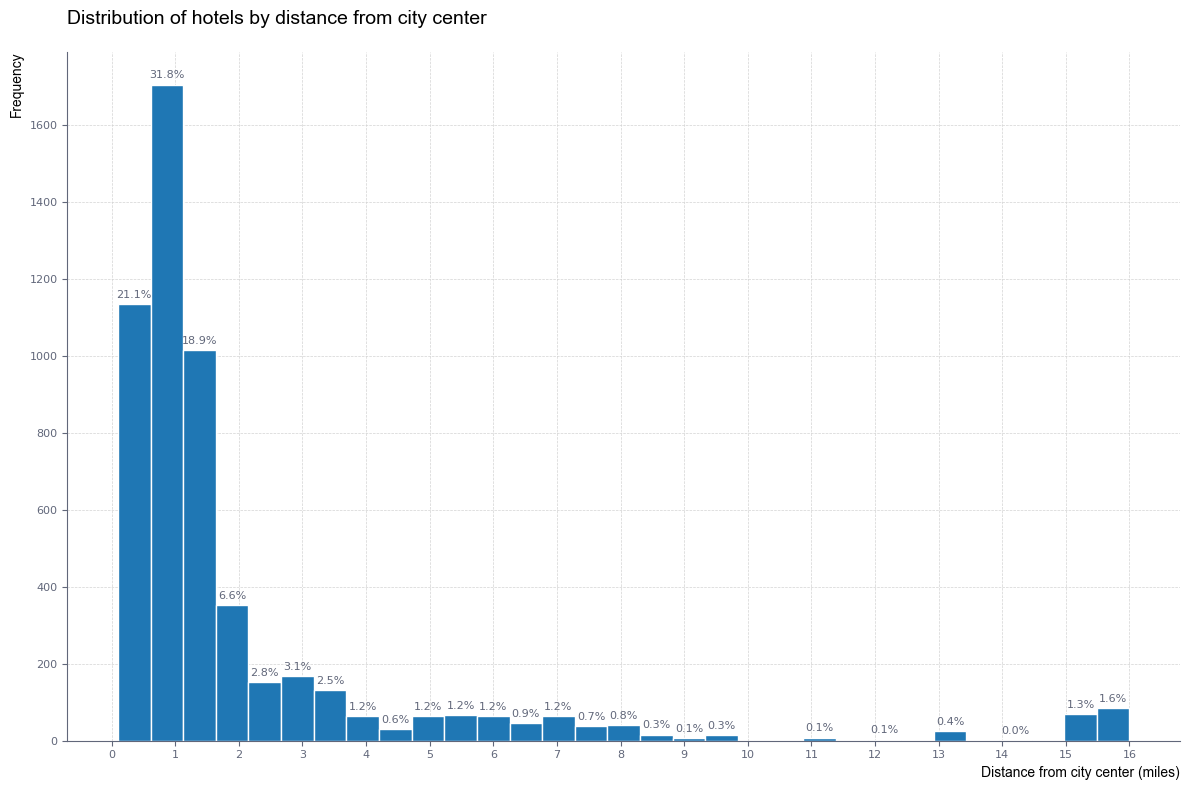

In [533]:
# Visualize the distribution of distance, no filters
# Set the bin width
bin_width = 0.5

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_hotels["distance"], bins=int((rome_hotels["distance"].max() - rome_hotels["distance"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Distance from city center (miles)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 17, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_hotels["distance"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels by distance from city center",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p><b>Question</b> - are there extreme values?</p>
<p>There <b>are</b> extreme values located specially above a 11-mile distance. Particularly, there are a few observations clustered at the 15 to 16-mile distance bins. Because this visualization does not apply any filter, we could first consider applying similar filters as used in the book example. Moreover, we already know that some hotels are actually in neighbouring cities, and not in Rome. Filtering the data might lead to a more meaningful result.</p> 


In [534]:
# Apply filters
rome_cut = rome.loc[
    (rome["accommodation_type"] == "Hotel") &
    (rome["city_actual"] == "Rome") &
    (rome["stars"] >= 3) &
    (rome["stars"] <= 4) &
    (~rome["stars"].isnull())
    ]

In [535]:
print(f"Number of rows in the original dataset: {(rome_hotels['distance'].count())}\nNumber of rows in the filtered dataset: {(rome_cut['distance'].count())}")
print(f"Difference between non-filtered and filtered datasets: \n{(rome_hotels['distance'].count()) - rome_cut['distance'].count()}")

Number of rows in the original dataset: 5363
Number of rows in the filtered dataset: 4117
Difference between non-filtered and filtered datasets: 
1246


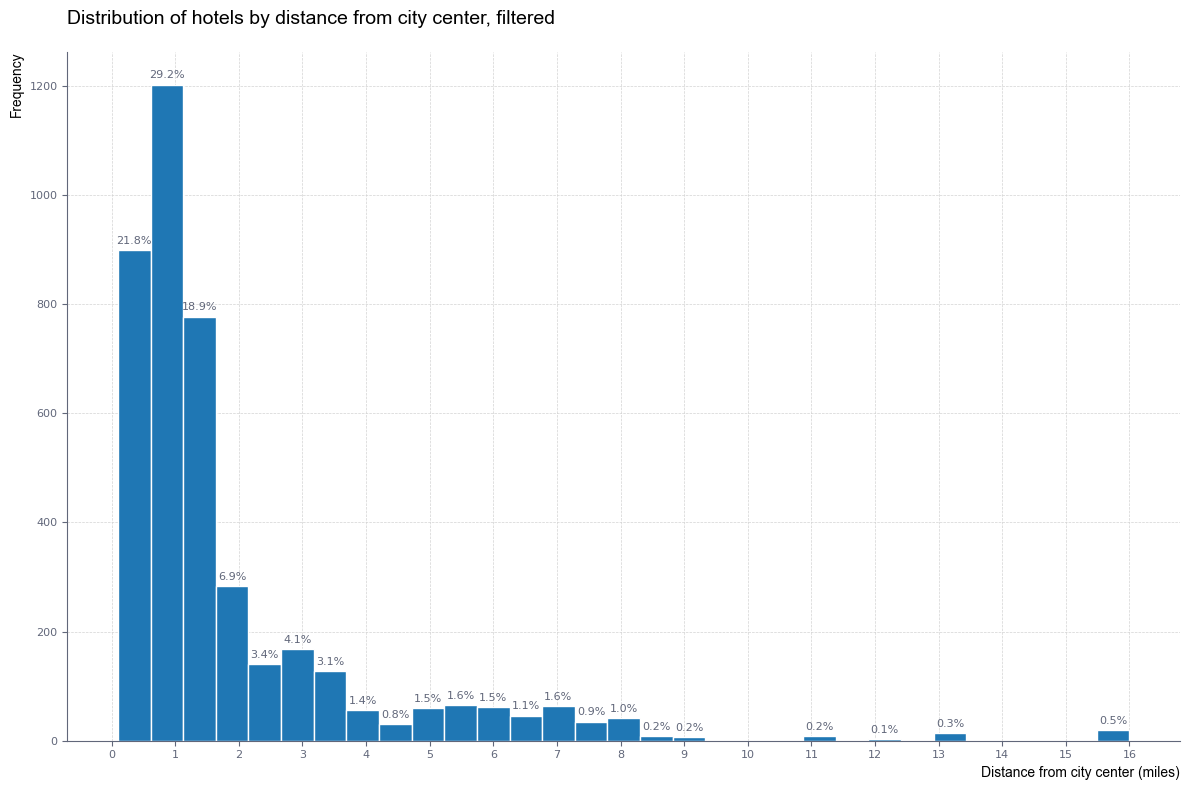

In [536]:
# Visualize the distribution of distance applying filters
# Set the bin width
bin_width = 0.5

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut["distance"], bins=int((rome_cut["distance"].max() - rome_cut["distance"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Distance from city center (miles)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 17, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut["distance"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels by distance from city center, filtered",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>The main difference we can notice is that hotels between 3 to 4 stars return observations that are not that concentrated in smaller differences. That is, our distribution does not become that skewed. We get higher percentage points for hotels ranging from 3 to 9-mile distances. Moreover, the proportion of hotels above the 9-mile bin fell significantly, which means that hotels that are far away either at the extreme of our filters - too expensive or whose ratings are too high or to low.</p>
<p>We can use the function we'd built, <code>tabulate</code>, to get the cumulative percentage points for the distance.</p>

In [537]:
tabulate(rome_cut["distance"])

,Freq.,Perc.,Cum
0.1,63,0.015,0.015
0.2,98,0.024,0.039
0.3,232,0.056,0.095
0.4,179,0.043,0.139
0.5,222,0.054,0.193
0.6,105,0.026,0.218
0.7,202,0.049,0.267
0.8,258,0.063,0.330
0.9,271,0.066,0.396
1.0,248,0.060,0.456


<p>As we can see, nearly 99% of the hotels are below a 9-mile distance. But let's be less conservative here. This is not Vienna - here, 90% of our observations fall below the 5-mile distance. Considering others statistics, such as the 25th and the 75th percentile, as well as the standard deviation, we can argue that these values are already way too out of our IQR. Also, by adding 4 miles to our research, we would get less then 10% of the dataset. I believe that getting rid of these observations is advisable. We could lose some good deals, but we would in return focus our research on the main conclusion we can get from hotels in Rome - <b>they are largely concentrated on city center</b>. First, we can reproduce the book's chart by making some annotations in the previous chart.</p>

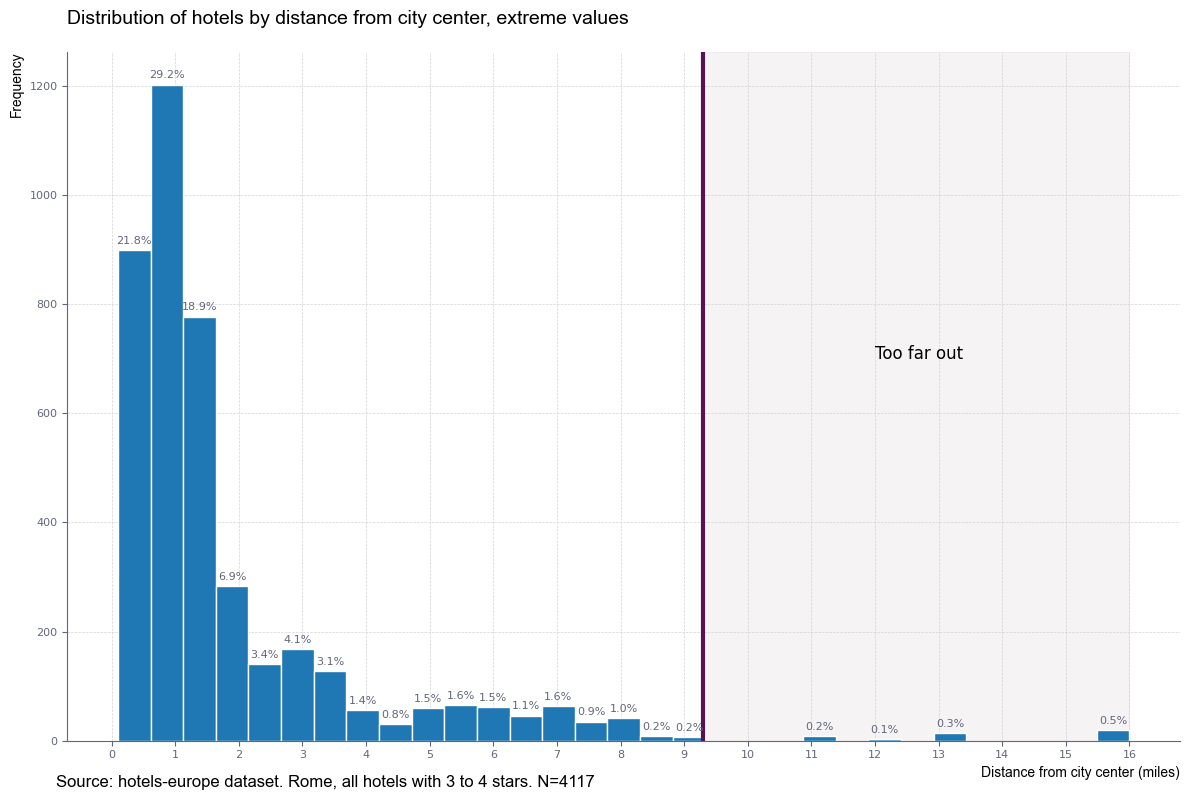

In [538]:
# Visualize the distribution of distance and annotate extreme values
# Set the bin width
bin_width = 0.5

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut["distance"], bins=int((rome_cut["distance"].max() - rome_cut["distance"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Add vertical line at specified x-axis value
x_value = 9.3
plt.axvline(x=x_value, color="#52154E", linewidth=3, linestyle="-")

# Fill the are above the x_value with a different color
plt.axvspan(x_value, rome_cut["distance"].max(), color="#52154E", alpha=0.05)

# Make annotation
plt.annotate("Too far out", xy=(12, 700), horizontalalignment="left",fontsize=12)

# Add caption
txt=f"Source: hotels-europe dataset. Rome, all hotels with 3 to 4 stars. N={rome_cut['distance'].count()}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=12, fontdict={"fontname": "Arial"})

# Set x and y axis labels
plt.xlabel("Distance from city center (miles)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 17, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut["distance"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels by distance from city center, extreme values",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>Aha! That looks much better! We can see what matplotlib can do with a few (well, not a few, actually) tweaks here and there. But we got what we wanted. We filtered the data, identified some extreme values, and now we can get the summary statistics before dropping the observations above ouur 9-mile threshold.</p>

In [539]:
statistics_ = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_cut["distance"].mean(),
        rome_cut["distance"].median(),
        rome_cut["distance"].mode().iloc[0],
        rome_cut["distance"].min(),
        rome_cut["distance"].max(),
        rome_cut["distance"].quantile(0.75) - rome_cut["distance"].quantile(0.25),
        rome_cut["distance"].quantile(0.25),
        rome_cut["distance"].quantile(0.75),
        bowley_skewness(rome_cut["distance"]),
        rome_cut["distance"].std(),
        rome_cut["distance"].count(),
    ],
}

summary_table = pd.DataFrame.from_dict(statistics).round(1)
summary_table

,Statistics,Value
0,Mean,2.1
1,Median,1.1
2,Mode,1.1
3,Min,0.1
4,Max,16.0
5,IQR,1.2
6,25th percentile,0.7
7,75th percentile,1.9
8,Skewness,0.3
9,Standard deviation,3.0


In [540]:
# Apply filters
rome_cut_distance = rome.loc[
    (rome["accommodation_type"] == "Hotel") &
    (rome["city_actual"] == "Rome") &
    (rome["stars"] >= 3) &
    (rome["stars"] <= 4) &
    (~rome["stars"].isnull()) &
    (rome["distance"] <= 5)
    ]

In [541]:
statistics = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_cut_distance["distance"].mean(),
        rome_cut_distance["distance"].median(),
        rome_cut_distance["distance"].mode().iloc[0],
        rome_cut_distance["distance"].min(),
        rome_cut_distance["distance"].max(),
        rome_cut_distance["distance"].quantile(0.75) - rome_cut_distance["distance"].quantile(0.25),
        rome_cut_distance["distance"].quantile(0.25),
        rome_cut_distance["distance"].quantile(0.75),
        bowley_skewness(rome_cut_distance["distance"]),
        rome_cut_distance["distance"].std(),
        rome_cut_distance["distance"].count(),
    ],
}

rome_distance_statistics = pd.DataFrame.from_dict(statistics).round(1)
rome_distance_statistics

,Statistics,Value
0,Mean,1.3
1,Median,1.0
2,Mode,1.2
3,Min,0.1
4,Max,5.0
5,IQR,0.8
6,25th percentile,0.7
7,75th percentile,1.5
8,Skewness,0.3
9,Standard deviation,1.0


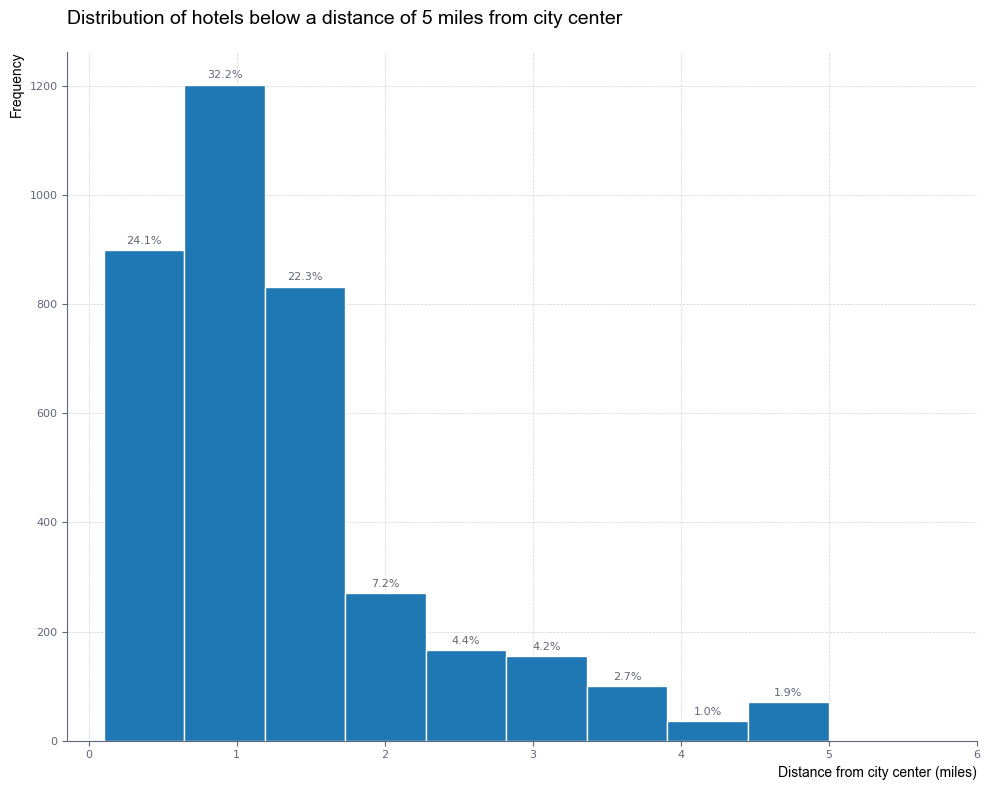

In [542]:
# Visualize the distribution of distance applying filters
# Set the bin width
bin_width = 0.5

# Create a new figure with adjusted padding
plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut_distance["distance"], bins=int((rome_cut_distance["distance"].max() - rome_cut_distance["distance"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Distance from city center (miles)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 7, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut_distance["distance"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels below a distance of 5 miles from city center",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

In [543]:
rome_distance_statistics

,Statistics,Value
0,Mean,1.3
1,Median,1.0
2,Mode,1.2
3,Min,0.1
4,Max,5.0
5,IQR,0.8
6,25th percentile,0.7
7,75th percentile,1.5
8,Skewness,0.3
9,Standard deviation,1.0


<p>The difference in our statistics is quite remarkable. The measurements of central value are closer now. The mean is still higher than the median and the mode, which confirms the right skewness of our distribution, yet it is far lower now, reducing the uncertainty of extreme values. The spread of our dataset also reduced a lot, obviously, which is shown in a much smaller IQR - only 0.8 mile between the 25th and the 7th percentile. This means that 50% of our dataset is very much concentrated in this range and translates into finding good deals in a clustered area, most likely. The standard deviation is 1, reducing from 2.2. Now that is quite remarkable, as we are more likely to get more predictable outcomes from a random sample. Finally, regarding skewness, we can conclude that it remained the same, showing that our data is quite skewed - most of the hotels are indeed very close to the city center.</p>
<p>Let's see what we have done so far in terms of data cleaning.</p>

In [544]:
print(f"""Number of samples: \n - Full dataset: {rome['distance'].count()}
    \n - Dataset with hotels only: {rome_hotels['distance'].count()}
    \n - Dataset in actual Rome and between 3-4 stars: {rome_cut['distance'].count()}
    \n - Dataset below 5-mile distance: {rome_cut_distance['distance'].count()}""")

Number of samples: 
 - Full dataset: 13214
    
 - Dataset with hotels only: 5363
    
 - Dataset in actual Rome and between 3-4 stars: 4117
    
 - Dataset below 5-mile distance: 3731


<p>We did a lot of cleanup, and some of it was deliberatly implemented based on my own decision on what to keep and what to discard.</p>
<h4>Conclusion</h4>
<ol><li>There are <b>extreme values</b> but they are <b>not</b> errors. We decided that hotels located above a 5-mile distance are extreme values.</li>
<ol><li>I decided to discard those values, as the number of miles vs the relative proportion of observations above the 5-mile distance seems to be too high.</li>
</ol><li>This decision was made based on a heavy right-tailed distribution, with many extreme values. Even when considering hotels that are somewhat closer to the city center, they represented a small proportion of the sample. Removing decreased the spread, the range, and the skewness of our dataset.</li>
</ol>
<p>Now,let's take a look at the prices.</p>

<h3>4.2.2 Visualize the distribution of price and compute their summary statistics.</h3>

<p>Let's first see the distribution of prices for all hotels in our dataset.</p>

In [545]:
stats_hotels_prices = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome["price"].mean(),
        rome["price"].median(),
        rome["price"].mode().iloc[0],
        rome["price"].min(),
        rome["price"].max(),
        rome["price"].quantile(0.75) - rome["price"].quantile(0.25),
        rome["price"].quantile(0.25),
        rome["price"].quantile(0.75),
        bowley_skewness(rome["price"]),
        rome["price"].std(),
        rome["price"].count(),
    ],
}

summary_table_prices = pd.DataFrame.from_dict(stats_hotels_prices).round(1)
summary_table_prices

,Statistics,Value
0,Mean,197.8
1,Median,124.0
2,Mode,90.0
3,Min,23.0
4,Max,4505.0
5,IQR,128.0
6,25th percentile,84.0
7,75th percentile,212.0
8,Skewness,0.3
9,Standard deviation,228.6


<p>Observations:</p>
<ul>
<li>The mean is 196 usd, the median, 124, and the mode, 90 usd. The three statistics are very different between themselves, which hints at a skewed distribution. Because the mean is higher than the median, we can expect a positive degree of skewness. Also, because the mode is far from the mean, we can also expect some data variability, which reflects the spread of the data.</li>
<li>The data is widely distributed. We have a minimum value of 23 usd and a max value of 4505 usd. We have very cheap and incredibly expensive hotel prices, yet as they are so distant from our measures of central value, we can say that they are extreme values (we'll deal with them later).</li>
<li>The IQR is 128, which means that 50% of our hotels are this price range.</li>
<li>The standard deviation is very high - 228. It indicates that there is significant variability in hotel prices, which leads to a wide dispersion of prices. Moreover, we can also say that the prices are more spread out, covering a broader range. Because of such high value, we can also infer that there are some extreme values - and indeed there are, as we can see on the max hotel price of 4505 usd. Here, we could make two assumptions. First, that there could be some price segmentation, in which some hotels cater to luxury travelers and others targetting budget-conscious travelers with lower prices. Second, there could be some correlation with hotel distance and price, but this is not our goal right now.</li>
<li>The skewness is positive , which shows that the mean is higher than the median. As such, we have some skew to the right, indicating some extreme values above the mean.</li>
</ul>
<p>Let's visualize this distribution right now!</p>


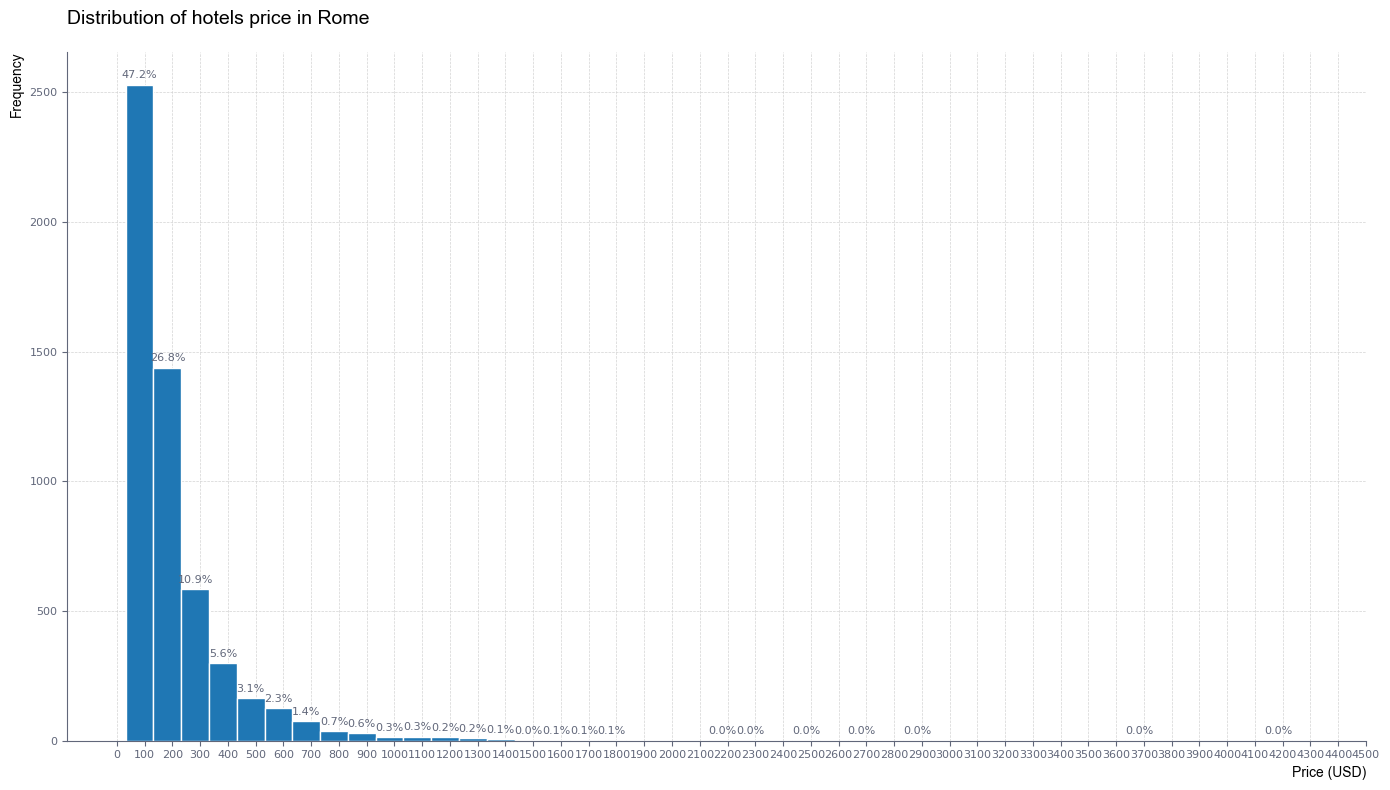

In [546]:
# Visualize the distribution of price, no filters
# Set the bin width
bin_width = 100

# Create a new figure with adjusted padding
plt.figure(figsize=(14, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_hotels["price"], bins=int((rome_hotels["price"].max() - rome_hotels["price"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Price (USD)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 4510, 100), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_hotels["price"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels price in Rome",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>As we can see, we have a very skewed distribution. Almost all of our observations are under 400usd.

<p>Because our goal is to find cheap hotels that are close to the city centre, we can apply some filters and remove the absurdly expensive prices. Let's just plot the distribution of ratings to see how many hotels fall under the 3 to 4 stars rating.</p>

In [547]:
rome_cut = rome.loc[
    (rome["accommodation_type"] == "Hotel") &
    (rome["city"] == "Rome") &
    (rome["stars"] >= 3) &
    (rome["stars"] <= 4) &
    (~rome["stars"].isnull())
]

In [548]:
statistics_price = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_cut["price"].mean(),
        rome_cut["price"].median(),
        rome_cut["price"].mode().iloc[0],
        rome_cut["price"].min(),
        rome_cut["price"].max(),
        rome_cut["price"].quantile(0.75) - rome_cut["price"].quantile(0.25),
        rome_cut["price"].quantile(0.25),
        rome_cut["price"].quantile(0.75),
        bowley_skewness(rome_cut["price"]),
        rome_cut["price"].std(),
        rome_cut["price"].count(),
    ],
}

summary_table_prices_stars = pd.DataFrame.from_dict(statistics_price).round(1)
print(f"""Summary statistics for all hotels:\n{summary_table_prices}\n\nSummary statistics for 3-4 star hotels:\n {summary_table_prices_stars}""")

Summary statistics for all hotels:
                Statistics    Value
0                     Mean    197.8
1                   Median    124.0
2                     Mode     90.0
3                      Min     23.0
4                      Max   4505.0
5                      IQR    128.0
6          25th percentile     84.0
7          75th percentile    212.0
8                 Skewness      0.3
9       Standard deviation    228.6
10  Number of observations  13214.0

Summary statistics for 3-4 star hotels:
                 Statistics   Value
0                     Mean   195.4
1                   Median   139.0
2                     Mode    77.0
3                      Min    35.0
4                      Max  2139.0
5                      IQR   128.0
6          25th percentile    94.0
7          75th percentile   222.0
8                 Skewness     0.3
9       Standard deviation   177.7
10  Number of observations  4242.0


In [549]:
rome_hotels["price"].std() - rome_cut["price"].std()

43.23150719369218

<p>We can see how filtering the data has changed our results. 
<ul><li>Our measures of central value changed - the mean reduced a bit, while the median and the mode changed a bit more.</li>
<li>The <b>spread</b> of our sample also changed. the min increased do 35usd, while the max value decreased to 2139usd. This is still way too much for a 3 to 4-star hotel price, and I am not sure that 35usd is a reasonable price for this rating range. In any case, the IQR remained the same, which shows that the spread of our sample remained the same too - most likely because we removed extreme values on the edges of our distribution. Indeed, our percentiles both increased by roughly 10usd. finally, we can affirm that the standard deviation changed significantly, an expected result as this statistic is sensitive to extreme values - by removing lowly and highly rated hotels, we removed extreme values on boths sides, decreasing the typical distance between observations and the mean. This is quite remarkable, as the mean reduced only by 2usd, while the standard deviation reduced by some 44usd.</li>
<li>Finally, the skewness of both summary statistics remained the same - some observations are still pulling the mean to the right!</li>
</ul>
<p>Now, let's take a look at this distribution.</p> 

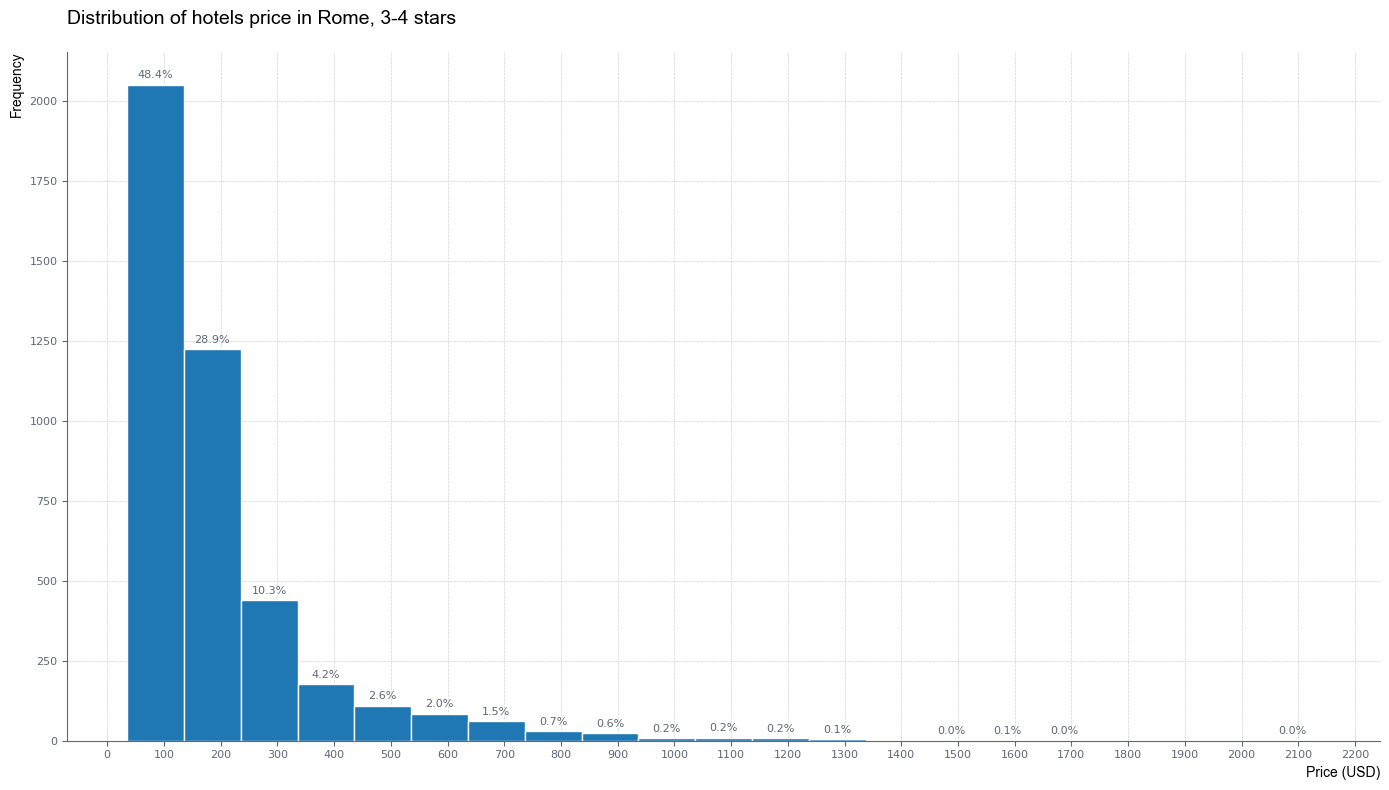

In [550]:
# Visualize the distribution of price, no filters
# Set the bin width
bin_width = 100

# Create a new figure with adjusted padding
plt.figure(figsize=(14, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut["price"], bins=int((rome_cut["price"].max() - rome_cut["price"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Price (USD)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, rome_cut["price"].max()+100, 100), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut["price"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels price in Rome, 3-4 stars",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>Aha! We can spot right on some extreme values to the right. Obviously any 4-star hotel wouldn't cost 2100usd! I wouldn't even pay 600 myself, although 2.0% of the observations fall under a approximate bin. Let's remove any values below 900 and reduce our bin size to 20usd.</p>

In [551]:
rome_cut_price = rome.loc[
    (rome["accommodation_type"] == "Hotel") &
    (rome["city_actual"] == "Rome") &
    (rome["stars"] >= 3) &
    (rome["stars"] <= 4) &
    (~rome["stars"].isnull()) &
    (rome["price"] <= 900)
    ]

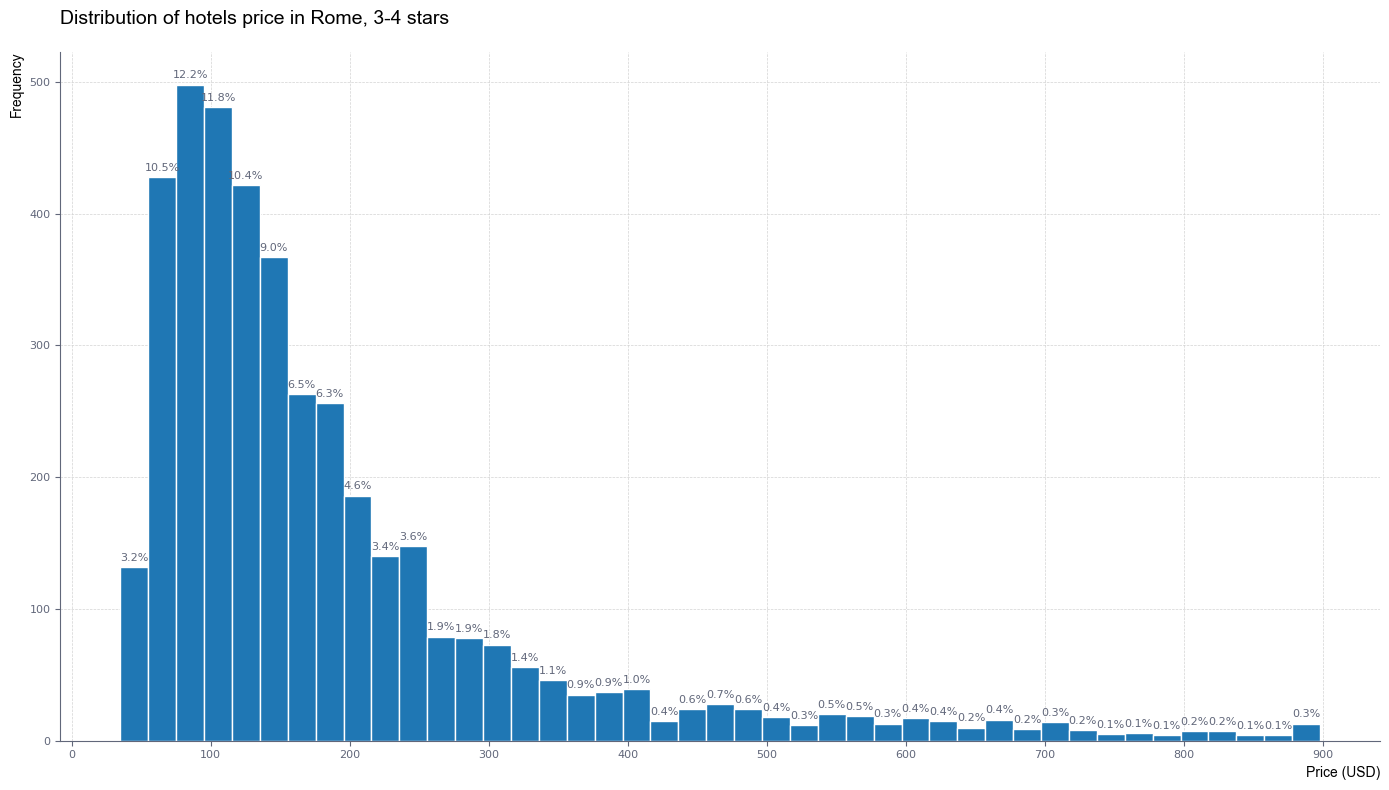

In [552]:
# Visualize the distribution of price, 3-4 stars below 900usd
# Set the bin width
bin_width = 20

# Create a new figure with adjusted padding
plt.figure(figsize=(14, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut_price["price"], bins=int((rome_cut_price["price"].max() - rome_cut_price["price"].min() ) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Price (USD)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, rome_cut_price["price"].max()+bin_width, 100), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut_price["price"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels price in Rome, 3-4 stars",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>Well, we can see this long tail to the right. Although they don't seem to be errors, paying 900usd for a hotel seems way out of our scope here. Let's filter our dataset to 400usd and see what happens.</p>

In [553]:
rome_cut_price = rome.loc[
    (rome["accommodation_type"] == "Hotel") &
    (rome["city_actual"] == "Rome") &
    (rome["stars"] >= 3) &
    (rome["stars"] <= 4) &
    (~rome["stars"].isnull()) &
    (rome["price"] <= 400)
    ]

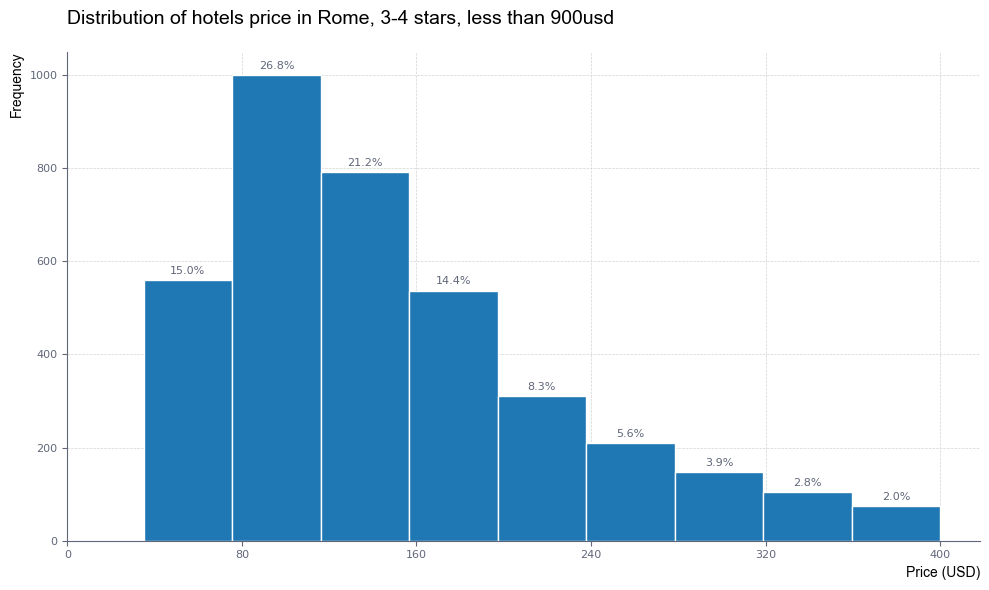

In [554]:
# Visualize the distribution of price, 3-4 stars below 900usd
# Set the bin width
bin_width = 40

# Create a new figure with adjusted padding
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut_price["price"], bins=int((rome_cut_price["price"].max() - rome_cut_price["price"].min() ) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Price (USD)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, rome_cut_price["price"].max()+bin_width, 80), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut_price["price"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels price in Rome, 3-4 stars, less than 900usd",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>Our distribution still looks skewed, but far less now. We can see that indeed there are some good deals below 80usd, while most of our data is concentrated between 80 and 240usd. Let's take a look at the changes that we did by taking a look at the summary statistics once again.</p>

In [555]:
statistics_filtered_prices = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        rome_cut_price["price"].mean(),
        rome_cut_price["price"].median(),
        rome_cut_price["price"].mode().iloc[0],
        rome_cut_price["price"].min(),
        rome_cut_price["price"].max(),
        rome_cut_price["price"].quantile(0.75) - rome_cut_price["price"].quantile(0.25),
        rome_cut_price["price"].quantile(0.25),
        rome_cut_price["price"].quantile(0.75),
        bowley_skewness(rome_cut_price["price"]),
        rome_cut_price["price"].std(),
        rome_cut_price["price"].count(),
    ],
}

summary_table_filtered_prices = pd.DataFrame.from_dict(statistics_filtered_prices).round(1)
print(f"""Summary statistics for 3-4 star hotels:\n{summary_table_prices_stars}\n\nSummary statistics for 3-4 star hotels below 400usd:\n {summary_table_filtered_prices}""")

Summary statistics for 3-4 star hotels:
                Statistics   Value
0                     Mean   195.4
1                   Median   139.0
2                     Mode    77.0
3                      Min    35.0
4                      Max  2139.0
5                      IQR   128.0
6          25th percentile    94.0
7          75th percentile   222.0
8                 Skewness     0.3
9       Standard deviation   177.7
10  Number of observations  4242.0

Summary statistics for 3-4 star hotels below 400usd:
                 Statistics   Value
0                     Mean   150.4
1                   Median   131.0
2                     Mode    77.0
3                      Min    35.0
4                      Max   400.0
5                      IQR    99.0
6          25th percentile    91.0
7          75th percentile   190.0
8                 Skewness     0.2
9       Standard deviation    78.4
10  Number of observations  3735.0


<p>The change was significant. Apart from the mode, which remained the same, the other two measures of central tendency were reduced - the mean, by some 45usd. By setting a max value of 400usd, the spread of our data was also affected. 50% of our data is between 91usd and 190usd, with an IQR of 99usd. That's not a lot - for half of our observations, the range is 100 usd. That's an improvement considering our initial range of 23 to 4230usd! Also, the standard deviation reduced a lot, which means that we can expect greater differences between observations from the mean. Finally, the degree of skewness also reduced, showing that our dataset, albeit skewed, is less skewed now.</p>
<h4>Conclusions</h4>
<ol>
<li>There are extreme values in the price variable. Some of them clearly were errors and were therfore removed.</li>
<li>Others were also considered extreme values because of the context. Prices above 400usd were considered way too much for a 3 to 4-star hotel and were therefore removed.</li></ol></p>
<p>As a final exercise, let's plot the distribution of distance considering hotels that cost up to 400 usd. Is our distribution going to change significantly? Let's take a look at the statistics first, and then the distribution.</p>

In [556]:
rome_cut_dist_price = rome.loc[
    (rome["accommodation_type"] == "Hotel") &
    (rome["city_actual"] == "Rome") &
    (rome["stars"] >= 3) &
    (rome["stars"] <= 4) &
    (~rome["stars"].isnull()) &
    (rome["price"] <= 400) &
    (rome["distance"] <= 5)
    ]

In [557]:
# Calculate percentage difference between two values
def calculate_percentage_difference(initial, current):
    return ((current - initial) / initial) * 100

stats_filtered_dist_prices = {
    "Statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
      "Initial_distance": [
        rome_hotels["distance"].mean(),
        rome_hotels["distance"].median(),
        rome_hotels["distance"].mode().iloc[0],
        rome_hotels["distance"].min(),
        rome_hotels["distance"].max(),
        rome_hotels["distance"].quantile(0.75) - rome_hotels["distance"].quantile(0.25),
        rome_hotels["distance"].quantile(0.25),
        rome_hotels["distance"].quantile(0.75),
        bowley_skewness(rome_hotels["distance"]),
        rome_hotels["distance"].std(),
        rome_hotels["distance"].count(),
    ],
    "Distance": [
        rome_cut_dist_price["distance"].mean(),
        rome_cut_dist_price["distance"].median(),
        rome_cut_dist_price["distance"].mode().iloc[0],
        rome_cut_dist_price["distance"].min(),
        rome_cut_dist_price["distance"].max(),
        rome_cut_dist_price["distance"].quantile(0.75) - rome_cut_dist_price["distance"].quantile(0.25),
        rome_cut_dist_price["distance"].quantile(0.25),
        rome_cut_dist_price["distance"].quantile(0.75),
        bowley_skewness(rome_cut_dist_price["distance"]),
        rome_cut_dist_price["distance"].std(),
        rome_cut_dist_price["distance"].count(),
    ],
     "Initial_price": [
        rome_hotels["price"].mean(),
        rome_hotels["price"].median(),
        rome_hotels["price"].mode().iloc[0],
        rome_hotels["price"].min(),
        rome_hotels["price"].max(),
        rome_hotels["price"].quantile(0.75) - rome_hotels["price"].quantile(0.25),
        rome_hotels["price"].quantile(0.25),
        rome_hotels["price"].quantile(0.75),
        bowley_skewness(rome_hotels["price"]),
        rome_hotels["price"].std(),
        rome_hotels["price"].count(),
    ],
    "Price": [
        rome_cut_dist_price["price"].mean(),
        rome_cut_dist_price["price"].median(),
        rome_cut_dist_price["price"].mode().iloc[0],
        rome_cut_dist_price["price"].min(),
        rome_cut_dist_price["price"].max(),
        rome_cut_dist_price["price"].quantile(0.75) - rome_cut_dist_price["price"].quantile(0.25),
        rome_cut_dist_price["price"].quantile(0.25),
        rome_cut_dist_price["price"].quantile(0.75),
        bowley_skewness(rome_cut_dist_price["price"]),
        rome_cut_dist_price["price"].std(),
        rome_cut_dist_price["price"].count(),
    ],
}

summary_table_dist_prices = pd.DataFrame.from_dict(stats_filtered_dist_prices).round(1)


# Calculate percentage differences
summary_table_dist_prices["%_price_chg"] = calculate_percentage_difference(summary_table_dist_prices["Initial_price"], summary_table_dist_prices["Price"]).round(2)
summary_table_dist_prices["%_dist_chg"] = calculate_percentage_difference(summary_table_dist_prices["Initial_distance"], summary_table_dist_prices["Distance"]).round(2)

column_order = [
    "Statistics", "Initial_distance", "Distance", "%_dist_chg",
    "Initial_price", "Price", "%_price_chg"
]
summary_table_dist_prices = summary_table_dist_prices[column_order]
summary_table_dist_prices

,Statistics,Initial_distance,Distance,%_dist_chg,Initial_price,Price,%_price_chg
0,Mean,2.1,1.3,-38.10,206.7,155.0,-25.01
1,Median,1.1,1.1,0.00,138.0,136.0,-1.45
2,Mode,1.1,1.2,9.09,66.0,145.0,119.70
3,Min,0.1,0.1,0.00,32.0,35.0,9.38
4,Max,16.0,5.0,-68.75,4234.0,400.0,-90.55
5,IQR,1.2,0.9,-25.00,150.5,98.2,-34.75
6,25th percentile,0.7,0.7,0.00,88.0,97.0,10.23
7,75th percentile,1.9,1.6,-15.79,238.5,195.2,-18.16
8,Skewness,0.3,0.2,-33.33,0.3,0.2,-33.33
9,Standard deviation,3.0,1.0,-66.67,221.0,77.3,-65.02


<p>Now that is a relevant table! Let's make the final comments:</p>
<ul>
<li>The mean of both variables changed. The average distance from city center was reduced to 1.3 mile, a 38% change, while the average price decreased by 25$, from 206usd to 155usd.</li>
<li>There was no significant change in the median, which was expected, given that it is robust to extreme values.</li>
<li>There was a <b>significant change</b> in the <b>mode</b>. In both cases, it increased, and in the case of prices, it increased <b>a lot</b>: from 66usd, our most frequent value became <b>145usd</b>. This suggests that some cheaper hotels were far away from the city center and therefore not the best deal, as we could find hotels that as cheap and at least much closer to the city center.</li>
<li>The range changed a lot, as we filtered the data. But one affected the other - by limiting the distance to 5 miles, we probably affected the minimum value of hotels, as the min increased by some 10%. This would confirm our previous inference.</li>
<li>The IQR, in both cases, was reduced. This implies that a big portion of our sample is now more concentrated in a smaller range. For instance, for distances, it was 0.9mile, between a 25th percentile of 0.7 and a 75th of 1.6. The latter decreased by some 16%. In the case of prices, the former increased while the latter decreased, resulting in a even higher % difference of roughly 35%. So, for 50% of our sample, the distance between those quartiles was also greatly reduced.</li>
<li>The changes in the standard deviation were also significant. In both cases, they diminished by more than 65%! This change reflects how extreme values affect the mean.</li>
<li>In both cases, there was a reduction in the level of skewness of the distribution of the dataset. This reflects a skewed distribution with not such a heavy tail to the right.</li>
</ul>
<p>Below, we can plot those two final charts and see the results in a visual way.</p>

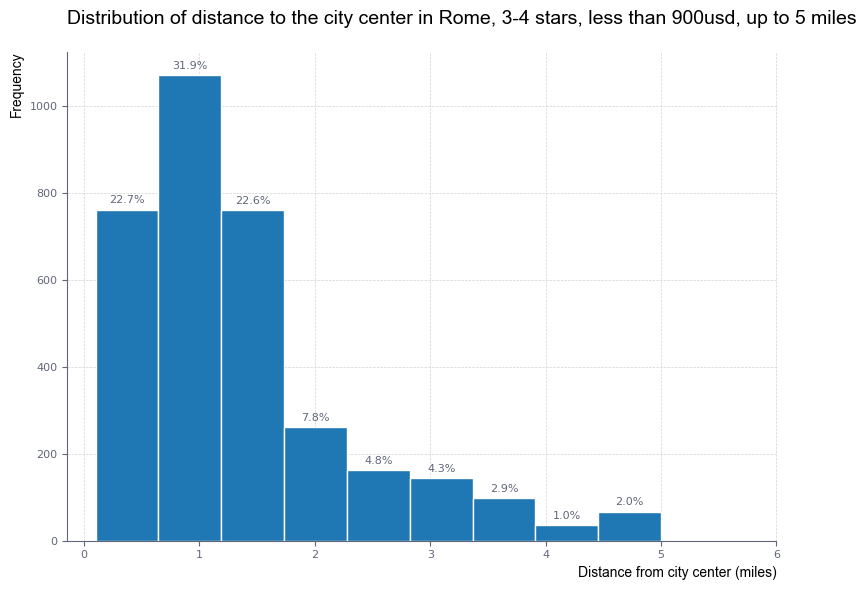

In [558]:
# Visualize the distribution of distance applying filters
# Set the bin width
bin_width = 0.5

# Create a new figure with adjusted padding
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut_dist_price["distance"], bins=int((rome_cut_dist_price["distance"].max() - rome_cut_dist_price["distance"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Distance from city center (miles)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 7, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut_dist_price["distance"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of distance to the city center in Rome, 3-4 stars, less than 900usd, up to 5 miles",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

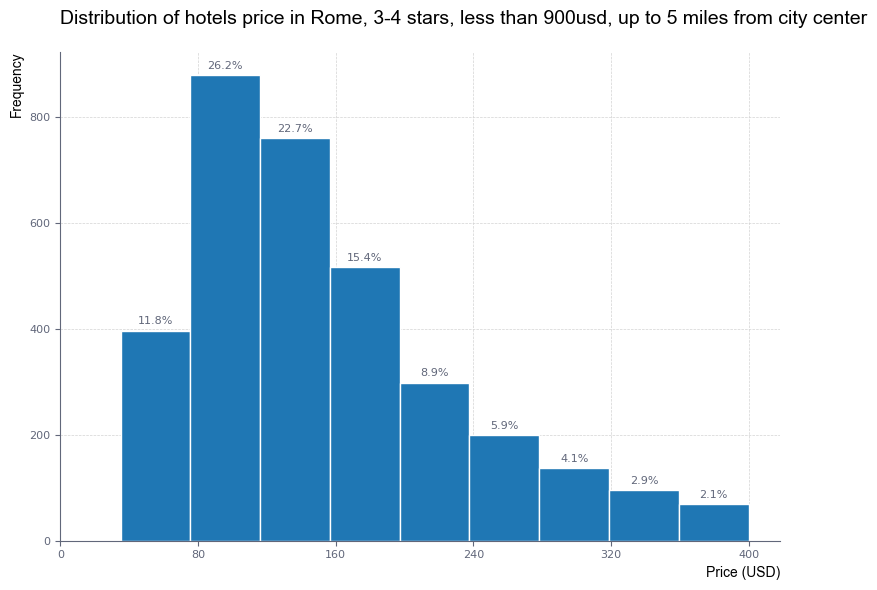

In [559]:
# Visualize the distribution of price, 3-4 stars below 900usd
# Set the bin width
bin_width = 40

# Create a new figure with adjusted padding
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(rome_cut_dist_price["price"], bins=int((rome_cut_dist_price["price"].max() - rome_cut_dist_price["price"].min() ) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Price (USD)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, rome_cut_dist_price["price"].max()+bin_width, 80), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = rome_cut_dist_price["price"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of hotels price in Rome, 3-4 stars, less than 900usd, up to 5 miles from city center",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<h2>5. Conclusion</h2>
<p>Wow, it's been a wild ride! We went though a lot in this notebook, but I got some valuable lessons from it:</p>
<ul>
<li>By exploring our dataset, I got to identify <b>extreme values</b> and measure their impact on the distribution of the dataset. I also understood how these values can impinge on specific statistics more than in others.</li>
<li>I understood a little bit of how removing extreme values in one variable can affect the other. For instance, after filtering the dataset by hotels and ratings, we could see that some prices did not match. Then, after applying a distance threshold, I saw how some hotels were too cheap yet too distance, while others were closer to the city center and presented prices within a similar range. This greatly helps our goal of finding good hotel deals, as we removed hotels that were good in prices yet not as attractive distance-wise.</li>
<li>Finally - and very importantly, I must say -, I understood the <b>subjective</b> part of data analysis. When dealing with extreme values, defining them can be tricky and most likely due to a <b>conscious choice</b>. It is part of the role of the data analyst to <b>clearly make these decisions and explain them</b>. Extreme values are very often extreme when compared to a <b>particular goal</b>, and not just some random errors (I wish they were though, as it would make our job quite easier yet less exciting!)
</li>
</ul>
<p>Well, that's it for today! I feel very proud of my work and I learned a lot from it! 
<hr>